# <font color= #2A6A44> **Segundo Examen Parcial** </font>

###  <font color= #4A976D> **Estimación Óptima** </font>

### <font color= #5FAF85> **Estudiantes:** </font>
- Clara Paola Aguilar Casillas

- Samantha Sánchez Tinoco

- Priscila Cervantes Ramírez

- Rafael Takata García

## <font color= #74C79D> **Introducción** </font>

A continuación se trabajará en equipos distintos problemas a resolver enfocados en la regresión lineal sobre el tema de predicción de **alturas** como variable a predecir(dependiente),y con las variables independientes **ancho** de hombros y talla de **pies**.

Se pondrán a prueba nuestros conocimientos y el poder trabajar en conjunto para poder llegar a un solo resultado siempre tratando de ser el mejor posible. 
Se implementarán conocimientos de código, de gráficas y de pensamiento crítico para saber entender de que tratan los resultados obtendremos.

In [161]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings('ignore')

Importamos los datos e información básica sobre estos:

In [162]:
df = pd.read_csv('C:/Users/prisc/OneDrive/Escritorio/4to semestre/estimación/examen2/datos_gente.csv')
df.head()

,altura,ancho,pie
0,185,55,28.0
1,173,44,26.5
2,163,44,24.0
3,162,44,24.5
4,172,46,27.0


In [163]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18 entries, 0 to 17
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   altura  18 non-null     int64  
 1   ancho   18 non-null     int64  
 2   pie     18 non-null     float64
dtypes: float64(1), int64(2)
memory usage: 564.0 bytes


In [164]:
df.describe()

,altura,ancho,pie
count,18.000000,18.000000,18.000000
mean,167.111111,45.222222,25.277778
std,10.208929,6.664706,2.170811
min,150.000000,38.000000,22.000000
25%,159.750000,40.000000,24.000000
50%,165.500000,44.000000,24.500000
75%,172.750000,48.750000,27.375000
max,187.000000,61.000000,29.000000


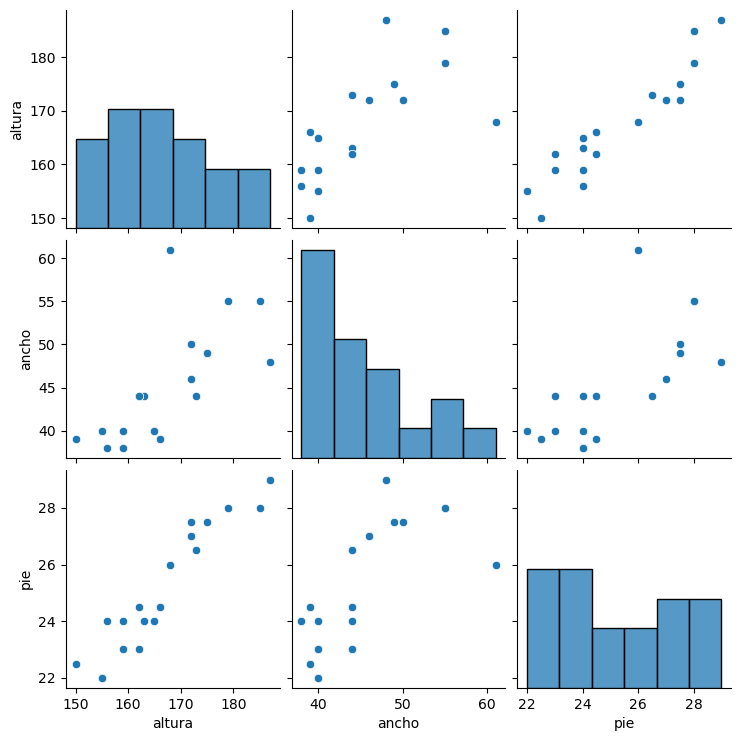

In [165]:
sns.pairplot(df)

<Axes: >

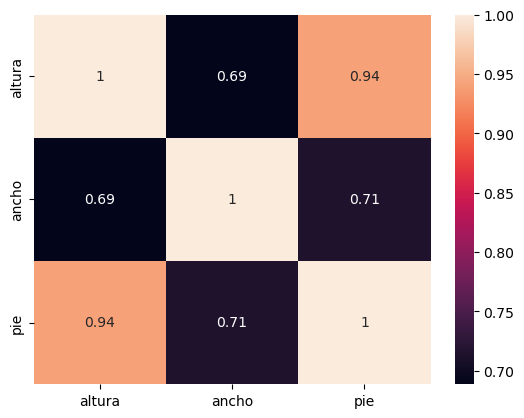

In [166]:
sns.heatmap(df.corr(), annot=True)

Después de un muy básico analisis inicial podemos ver que:

- Tenemos 18 entradas
- No hay datos faltantes
- Dos variables son de tipo `Int` y una `Float`
- Son relaciones lineales, altamente correlacionadas


---

Ahora empezaremos con la separación de los datos para nuestro modelo.

In [167]:
X = df[['ancho', 'pie']]
y = df['altura']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

En este caso, nosotros hemos propuesto tres modelos iniciales.

- Una Regresión lineal sin regularización

- Ridge

- Lasso

In [168]:
#Regresión lineal
#Entrenamiento
lr = LinearRegression()
lr.fit(X_train, y_train)

#Predicción
y_test_pred = lr.predict(X_test)
mse_test = mean_squared_error(y_test, y_test_pred)
r2_test = r2_score(y_test, y_test_pred)

#Resultados
print(f"Error cuadrático medio en prueba: {mse_test:.4f}")
print(f"R² en prueba: {r2_test:.4f}")

print(f"Pendiente: {lr.coef_[0]}")
print(f"Intercepción: {lr.intercept_}")

Error cuadrático medio en prueba: 11.6061
R² en prueba: 0.8425
Pendiente: -0.0031472081218276507
Intercepción: 54.284347023534835


In [169]:
#Ridge
#Entrenamiento
ridge = Ridge()
ridge.fit(X_train, y_train)

#Predicción
y_test_pred = ridge.predict(X_test)
mse_test = mean_squared_error(y_test, y_test_pred)
r2_test = r2_score(y_test, y_test_pred)

#Resultados
print(f"Error cuadrático medio en prueba: {mse_test:.4f}")
print(f"R² en prueba: {r2_test:.4f}")

print(f"Pendiente: {ridge.coef_[0]}")
print(f"Intercepción: {ridge.intercept_}")

Error cuadrático medio en prueba: 11.3509
R² en prueba: 0.8459
Pendiente: 0.024043647645112996
Intercepción: 56.545484126913365


In [170]:
#Lasso
#Entrenamiento
lasso = Lasso()
lasso.fit(X_train, y_train)

#Predicción
y_test_pred = lasso.predict(X_test)
mse_test = mean_squared_error(y_test, y_test_pred)
r2_test = r2_score(y_test, y_test_pred)

#Resultados
print(f"Error cuadrático medio en prueba: {mse_test:.4f}")
print(f"R² en prueba: {r2_test:.4f}")

print(f"Pendiente: {lasso.coef_[0]}")
print(f"Intercepción: {lasso.intercept_}")

Error cuadrático medio en prueba: 11.3108
R² en prueba: 0.8465
Pendiente: 0.03718503995685833
Intercepción: 60.24261755999828


Obtuvimos resultados muy similares en primera instancia, veamos si a través del tuneo de híperparametros obtenemos mejores resultados:

---
Ridge

In [171]:
#Definimos el espacio de busqueda
alphas = np.logspace(0, 10, 100)

#Parametros y busqueda
param_grid = {'alpha': alphas}
grid_search = GridSearchCV(ridge, param_grid, cv=5, scoring='r2')
grid_search.fit(X_train, y_train)

#Mejor alpha
best_alpha = grid_search.best_params_['alpha']
print(f"Mejor alpha encontrado: {best_alpha}")

Mejor alpha encontrado: 1.5922827933410924


Veamos los resultados con el alpha optimizado a través del grid search:

In [172]:
ridge = Ridge(alpha=best_alpha)
ridge.fit(X_train, y_train)

#Predicción
y_test_pred = ridge.predict(X_test)
mse_test = mean_squared_error(y_test, y_test_pred)
r2_test = r2_score(y_test, y_test_pred)

#Resultados
print(f"Error cuadrático medio en prueba: {mse_test:.4f}")
print(f"R² en prueba: {r2_test:.4f}")

print(f"Pendiente: {ridge.coef_[0]}")
print(f"Intercepción: {ridge.intercept_}")

Error cuadrático medio en prueba: 11.2384
R² en prueba: 0.8474
Pendiente: 0.039290144371738694
Intercepción: 57.8188219075448


Los resultados no cambian mucho pero, si obtenemos mejores resultados en la prueba y el testing.

Lasso

In [173]:
grid_search = GridSearchCV(lasso, param_grid, cv=5, scoring='r2')
grid_search.fit(X_train, y_train)

#Mejor alpha
best_alpha = grid_search.best_params_['alpha']
print(f"Mejor alpha encontrado: {best_alpha}")

Mejor alpha encontrado: 1.5922827933410924


In [174]:
lasso = Lasso(alpha=best_alpha)
lasso.fit(X_train, y_train)

#Predicción
y_test_pred = lasso.predict(X_test)
mse_test = mean_squared_error(y_test, y_test_pred)
r2_test = r2_score(y_test, y_test_pred)

#Resultados
print(f"Error cuadrático medio en prueba: {mse_test:.4f}")
print(f"R² en prueba: {r2_test:.4f}")

print(f"Pendiente: {lasso.coef_[0]}")
print(f"Intercepción: {lasso.intercept_}")

Error cuadrático medio en prueba: 11.3785
R² en prueba: 0.8455
Pendiente: 0.06099087779669853
Intercepción: 63.7708782039431


### Evaluación

Después del fine-tuning, podemos observar que el modelo que nos da mejores resultados en la prueba es `Ridge` después de que realizaramos la optimización.

### <font color= #74C79D> **1.** </font>
 Realiza la gráfica de tu modelo con un scatterplot de los datos incluyendo el valor de R2 y RMSE.

a. ¿Por qué seleccionaste ese modelo?

Como se mencionó anteriormente se seleccionó el modelo de **Ridge** ya que fue el que nos dio mejores resultados, y se seleccionó un modelo múltiple ya que estaremos trabajando con las dos variables independientes ('ancho','pie') para obtener mejores resultados de la dependiente ('altura') o a predecir.

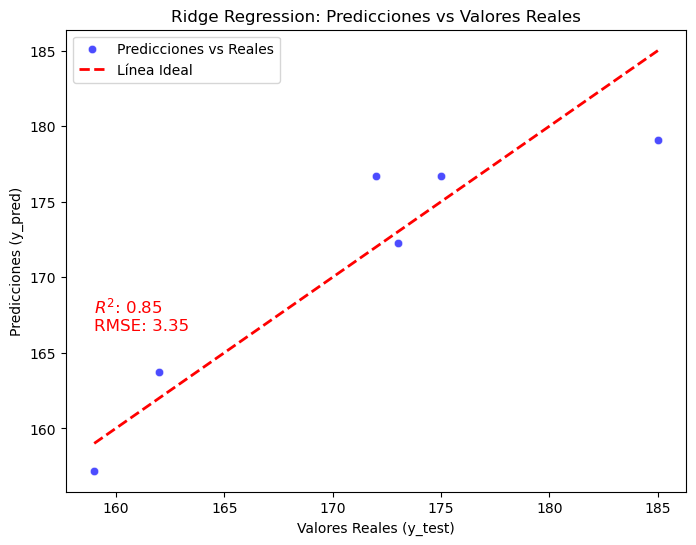

In [175]:
# Predicciones del modelo
y_pred = ridge.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

# Gráfico de dispersión
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.7, label="Predicciones vs Reales", color="blue")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2, label="Línea Ideal")

# Agregar valores de R² y RMSE a la gráfica
plt.text(y_test.min(), y_test.max() * 0.9, f"$R^2$: {r2:.2f}\nRMSE: {rmse:.2f}", fontsize=12, color="red")

# Etiquetas y título
plt.xlabel("Valores Reales (y_test)")
plt.ylabel("Predicciones (y_pred)")
plt.title("Ridge Regression: Predicciones vs Valores Reales")
plt.legend()
plt.show()

Podemos observar que el modelo explica en un 85% de la variabilidad de los datos de prueba, eso nos quiere decir que no está tan mal pero podría mejorar.

Por otro lado las predicciones del modelo están a 3.35 valores, esto nos indica que tenemos varios outliers altos que nos está afectando nuestro modelo. 


b. ¿Utilizaste alguna regularización?

El algoritmo propuesto usa una regularización L2 o de Ridge, en este caso, con un alpha de: $1.5922827933410924$ Con esto, podemos evitar el sobreajuste y mejorar la calidad de nuestras predicciones.

---

### <font color= #74C79D> **2.** </font>
 Se te solicita que tu modelo sea tropicalizado a la población de estudiantes del iteso. Realiza la gráfica de tu propuesta con un scatterplot de los datos incluyendo el valor de R2 y RMSE.

a. ¿Agregarías datos a tu base de datos para mejorar las predicciones del modelo?

Sí, como nuestra base de datos inicial es pequeña, el rendimiento del modelo no es lo suficientemente bueno.

Es por esto que, se agregaron más datos a nuestra base ya que, con los anteriores no eran  suficientes para poder realizar predicciones de la mejor manera y se concentraba en el promedio de la mayoría de las personas que tomamos las medidas principales (el promedio de la muestra). Esto hacía que con los valores atípicos las predicciones no se le acercaban en los valores reales en lo más mínimo. Al agregar más datos se amplía el panorama para poder mejorar el modelo. 

In [176]:
#Solo tenemos 18 muestras
df.shape

(18, 3)

b. ¿Cómo conseguirías dicha información?

La información se podría obtener a través de las mediciones de los alumnos del iteso, no necesariamente que conozcamos, sino recaudar más infromación posible, acercándonos a preguntarles. 

Otra manera sería la creación de datos sínteticos que asemejen a los outliers o aquellos datos que tenemos pocos.

En esta práctica, hemos tomado más muestras de alumnos obteniendo el siguiente resultado:

In [177]:
df_amp = pd.read_csv('datos_gente_nuevo.csv')
df_amp.shape

(33, 3)

Es un dataframe con 99 muestras, lo que amplia mucho más el panorama y nuestra información para el modelo.

c. ¿Modificarías algún parámetro de tu modelo?

Sí, al añadir datos a nuestro modelo y mantener el alpha actual, al momento de hacer el entrenamiento y debido a la cantidad nueva de datos disponibles, podríamos caer nuevamente en un sobreajuste y sería necesario el buscar otro alpha que evite el overfitting.

Nuestros datos nuevos (obtenidos a través de medición empirica de los estudiantes) se ve así:

<Axes: >

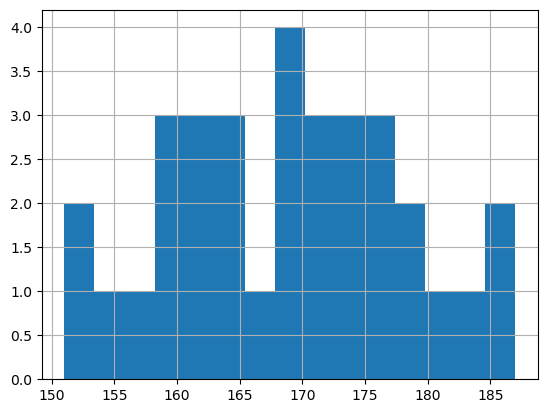

In [178]:
df_amp['altura'].hist(bins=15)

Podemos apreciar que, a pesar de las nuevas muestras, seguimos teniendo muy poca información de las personas que miden más de 175 y menos de 160. Podemos crear modelos enfocados solo a estas alturas y crear copias sínteticas para su entrenamiento.

Esto mejoraría la calidad de nuestras predicciones en estos rangos de altura.

### Creación de los modelos enfocados a outliers:

In [179]:
df_menor = df_amp[df_amp['altura'] < 160]
df_mayor = df_amp[df_amp['altura'] > 175]

df_menor.shape, df_mayor.shape

((6, 3), (7, 3))

A pesar de representar rangos de altura de 10 cm o más, solo tienen una concentración del 20% o menos de nuestros datos en cada una.

Ahora creamos los datos sínteticos:

#### Menor

In [180]:
df_menor.mean(), df_menor.std()

(altura    155.333333
 ancho      39.166667
 pie        22.916667
 dtype: float64,
 altura    3.386247
 ancho     0.983192
 pie       0.917424
 dtype: float64)

Ahora solo nos apoyamos de herramientas como numpy para la creación síntetica de los datos:

In [181]:
#Garantizamos los mismos resultados para que no dependan de la aleatoriedad del generador
np.random.seed(42)

In [182]:
altura_m = np.sort(np.round(np.random.normal(loc=154.58823529411765, scale=2.895229341723462, size=100), 0))
ancho_m = np.sort(np.round(np.random.normal(loc=40.058824, scale=3.051036, size=100), 0))
pie_m = np.sort(np.round(np.random.normal(loc=23.117647, scale=0.820240, size=100), 1))
df_menor_sintetico = pd.DataFrame({'altura': altura_m, 'ancho': ancho_m, 'pie': pie_m})
df_menor_sintetico.head()

,altura,ancho,pie
0,147.0,34.0,20.5
1,149.0,35.0,21.5
2,149.0,35.0,21.5
3,149.0,35.0,21.6
4,149.0,36.0,21.8


### Mayor

In [183]:
df_mayor.mean(), df_mayor.std()

(altura    181.142857
 ancho      52.428571
 pie        27.642857
 dtype: float64,
 altura    3.976119
 ancho     5.126960
 pie       0.626783
 dtype: float64)

In [184]:
altura_M = np.sort(np.round(np.random.normal(loc=180.105263, scale=3.695263, size=100), 0))
ancho_M = np.sort(np.round(np.random.normal(loc=49.263158, scale=4.805577, size=100), 0))
pie_M = np.sort(np.round(np.random.normal(loc=27.657895, scale=1.014515, size=100), 1))
df_mayor_sintetico = pd.DataFrame({'altura': altura_M, 'ancho': ancho_M, 'pie': pie_M})
df_mayor_sintetico.head()

,altura,ancho,pie
0,172.0,38.0,25.2
1,174.0,39.0,25.4
2,175.0,39.0,25.6
3,175.0,41.0,25.8
4,175.0,41.0,25.8


### Media

Para no generar un desbalanceo, debemos de crear datos sínteticos en la media tambien

In [185]:
df_media = df_amp[(df_amp['altura'] > 160) & (df_amp['altura'] < 175)]
df_media.shape #Hacen falta mínimo unos 67 datos

(17, 3)

In [186]:
df_media.mean(), df_media.std()

(altura    167.882353
 ancho      43.882353
 pie        25.264706
 dtype: float64,
 altura    4.442442
 ancho     4.768154
 pie       1.300452
 dtype: float64)

In [187]:
altura_media = np.sort(np.round(np.random.normal(loc=168, scale=4.551242, size=75), 0)) 
ancho_media = np.sort(np.round(np.random.normal(loc=44.254545, scale=4.074392, size=75), 0))
pie_media = np.sort(np.round(np.random.normal(loc=25.272727, scale=1.426658, size=75), 1))
df_media_sint = pd.DataFrame({'altura': altura_media, 'ancho': ancho_media, 'pie': pie_media})
df_media_sint.head()

,altura,ancho,pie
0,156.0,36.0,22.9
1,156.0,37.0,23.0
2,159.0,37.0,23.2
3,160.0,37.0,23.3
4,160.0,38.0,23.4


### Dataframe junto

Gracias a las nuevas muestras, tanto reales como sínteticas, podemos obtener este dataframe nuevo:

In [188]:
df_amp_sint = pd.concat([df_media_sint, df_menor_sintetico, df_mayor_sintetico], ignore_index=True)
df_amp_sint.shape

(275, 3)

Ahora tenemos un dataframe con casí 300 muestras y que, su distribución de alturas se ve así:

<Axes: >

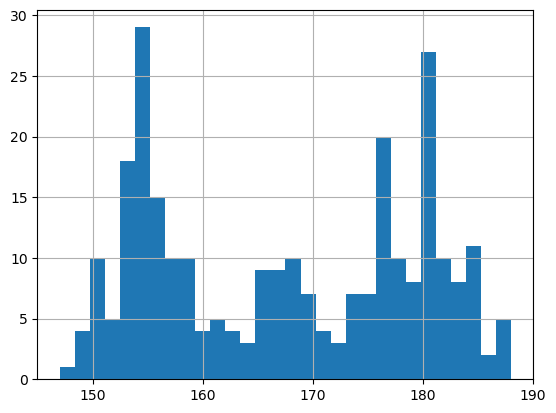

In [189]:
df_amp_sint['altura'].hist(bins=30)

Esta distribución ya representa más información en los datos donde no teniamos información. Además, tenemos los datos separados en menores y mayores donde nuestra primera muestra de la población carecía de entradas por lo que, ahora podemos entrenar modelos especificos para estos rangos o mejorar la calidad de un algoritmo general.

Veamos como funciona nuestro modelo tomando estos datos, representando de mejor forma la población general del ITESO:

Primero separamos en entrenamiento y prueba:

In [190]:
X = df_amp_sint[['ancho','pie']]
y = df_amp_sint['altura']
X_train_iteso, X_test_iteso, y_train_iteso, y_test_iteso = train_test_split(X, y, test_size = 0.2, random_state = 42)

Entrenamos y buscamos el mejor alpha:

In [191]:
ridge_iteso = Ridge()
grid_search = GridSearchCV(ridge_iteso, param_grid, cv=5, scoring='r2')
grid_search.fit(X_train_iteso, y_train_iteso)
best_alpha_iteso = grid_search.best_params_['alpha']
print(f"Mejor alpha encontrado: {best_alpha_iteso}")

Mejor alpha encontrado: 1.0


In [192]:
ridge_iteso = Ridge(best_alpha_iteso)
ridge_iteso.fit(X_train_iteso, y_train_iteso)
y_pred_iteso = ridge_iteso.predict(X_test_iteso)
r2 = r2_score(y_test_iteso, y_pred_iteso)
rmse = np.sqrt(mean_squared_error(y_test_iteso, y_pred_iteso))
print("R2", r2, 'RMSE', rmse)

R2 0.9696158934299914 RMSE 2.043484988361297


Obtenemos buenos resultados en el R2 que no muestrns un sobreajuste claro, sin embargo, el RMSE es bastante alto. Veamos como se ve la gráfica de los resultados:

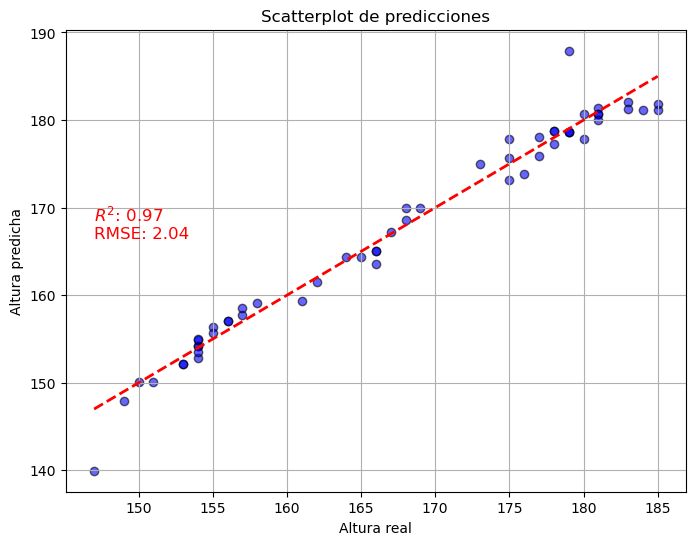

In [193]:
plt.figure(figsize=(8, 6))
plt.scatter(x=y_test_iteso, y=y_pred_iteso, alpha=0.6, edgecolors='k',label="Predicciones vs Reales", color="blue")
plt.plot([y_test_iteso.min(), y_test_iteso.max()], [y_test_iteso.min(), y_test_iteso.max()], 'r--', lw=2,label="Línea Ideal")  # Línea de referencia
plt.xlabel("Altura real")
plt.ylabel("Altura predicha")
plt.title(f"Scatterplot de predicciones")
plt.text(y_test_iteso.min(), y_test_iteso.max() * 0.9, f"$R^2$: {r2:.2f}\nRMSE: {rmse:.2f}", fontsize=12, color="red")
plt.grid(True)
plt.show()

La mayoría de los errores se encuentran en donde era la media de nuestros valores reales, por lo que tal vez sea recomendable separar en 3 modelos de predicción. Los sínteticos menores, los normales y los mayores.

### Creación de los 3 modelos separados:

Modelo de los menores:

In [194]:
X = df_menor_sintetico[['ancho','pie']]
y = df_menor_sintetico['altura']
X_train_menor, X_test_menor, y_train_menor, y_test_menor = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [195]:
ridge_menor = Ridge()
grid_search = GridSearchCV(ridge_menor, param_grid, cv=5, scoring='r2')
grid_search.fit(X_train_menor, y_train_menor)
best_alpha_menor = grid_search.best_params_['alpha']
print(f"Mejor alpha encontrado: {best_alpha_menor}")

Mejor alpha encontrado: 2.535364493970112


In [196]:
ridge_menor = Ridge(best_alpha_menor)
ridge_menor.fit(X_train_menor, y_train_menor)
y_pred_menor = ridge_menor.predict(X_test_menor)
r2 = r2_score(y_test_menor, y_pred_menor)
rmse = np.sqrt(mean_squared_error(y_test_menor, y_pred_menor))
print("R2", r2, 'RMSE', rmse)

R2 0.9436357795918595 RMSE 0.6496361291568934


Estos resultados muestran un claro sobreajuste, podemos mover las alphas para evitar el overfitting.

In [197]:
alphas_test = np.linspace(1, 200, 10)
for alpha in alphas_test:
    ridge_menor = Ridge(alpha=alpha)
    ridge_menor.fit(X_train_menor, y_train_menor)
    y_pred_menor = ridge_menor.predict(X_test_menor)
    r2_menor = r2_score(y_test_menor, y_pred_menor)
    rmse_menor = np.sqrt(mean_squared_error(y_test_menor, y_pred_menor))
    print("alpha", alpha, "R2", r2_menor, 'RMSE', rmse_menor)

alpha 1.0 R2 0.9525103232419082 RMSE 0.5963044144782195
alpha 23.11111111111111 R2 0.9199552811998123 RMSE 0.7741671860886417
alpha 45.22222222222222 R2 0.9103270481802815 RMSE 0.8194060206943454
alpha 67.33333333333333 R2 0.9014534422512518 RMSE 0.858992055343792
alpha 89.44444444444444 R2 0.8925195728339568 RMSE 0.8970839974081294
alpha 111.55555555555556 R2 0.8834077706011 RMSE 0.9343362979271779
alpha 133.66666666666666 R2 0.8741210317932538 RMSE 0.9708340612318936
alpha 155.77777777777777 R2 0.864691187248289 RMSE 1.006540975558589
alpha 177.88888888888889 R2 0.8551558527309973 RMSE 1.041403165290301
alpha 200.0 R2 0.8455513877476603 RMSE 1.0753762059109333


Creemos que el que tiene un `R2` de 0.901 puede ser un buen alpha.

In [198]:
ridge_menor = Ridge(alpha=67.3)
ridge_menor.fit(X_train_menor, y_train_menor)
y_pred_menor = ridge_menor.predict(X_test_menor)
r2_menor = r2_score(y_test_menor, y_pred_menor)
rmse_menor = np.sqrt(mean_squared_error(y_test_menor, y_pred_menor))
print("R2", r2_menor, 'RMSE', rmse_menor)

R2 0.9014668042701452 RMSE 0.8589338176060409


Modelo de la media 'real':

In [199]:
X = df_media_sint[['ancho','pie']]
y = df_media_sint['altura']
X_train_media, X_test_media, y_train_media, y_test_media = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [200]:
ridge_media = Ridge()
grid_search = GridSearchCV(ridge_media, param_grid, cv=5, scoring='r2')
grid_search.fit(X_train_media, y_train_media)
best_alpha_media = grid_search.best_params_['alpha']
print(f"Mejor alpha encontrado: {best_alpha_media}")

Mejor alpha encontrado: 1.0


In [201]:
for alpha in alphas_test:
    ridge_media = Ridge(alpha=alpha)
    ridge_media.fit(X_train_media, y_train_media)
    y_pred_media = ridge_media.predict(X_test_media)
    r2_media = r2_score(y_test_media, y_pred_media)
    rmse_media = np.sqrt(mean_squared_error(y_test_media, y_pred_media))
    print("alpha", alpha, "R2", r2_media, 'RMSE', rmse_media)

alpha 1.0 R2 0.9737231655739774 RMSE 0.8974161680485239
alpha 23.11111111111111 R2 0.969551806565726 RMSE 0.9660244807635355
alpha 45.22222222222222 R2 0.9659653105439209 RMSE 1.0213351142045426
alpha 67.33333333333333 R2 0.9618286007184449 RMSE 1.0816242301806087
alpha 89.44444444444444 R2 0.9570862992679298 RMSE 1.1468466530222123
alpha 111.55555555555556 R2 0.9517953002621886 RMSE 1.2154918700618418
alpha 133.66666666666666 R2 0.9460266051316553 RMSE 1.286166623060956
alpha 155.77777777777777 R2 0.9398485732760605 RMSE 1.357782896552377
alpha 177.88888888888889 R2 0.9333232611371874 RMSE 1.4295341761846072
alpha 200.0 R2 0.9265058876198768 RMSE 1.5008373943655278


Creemos que el que tiene un `R2` de 0.926 es el ideal para prevenir el sobreajuste.

In [202]:
ridge_media = Ridge(alpha=200)
ridge_media.fit(X_train_media, y_train_media)
y_pred_media = ridge_media.predict(X_test_media)
r2 = r2_score(y_test_media, y_pred_media)
rmse = np.sqrt(mean_squared_error(y_test_media, y_pred_media))
print("R2", r2, 'RMSE', rmse)

R2 0.9265058876198768 RMSE 1.5008373943655278


Modelo de los mayores:

In [203]:
X = df_mayor_sintetico[['ancho','pie']]
y = df_mayor_sintetico['altura']
X_train_mayor, X_test_mayor, y_train_mayor, y_test_mayor = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [204]:
ridge_mayor = Ridge()
grid_search = GridSearchCV(ridge_mayor, param_grid, cv=5, scoring='r2')
grid_search.fit(X_train_mayor, y_train_mayor)
best_alpha_mayor = grid_search.best_params_['alpha']
print(f"Mejor alpha encontrado: {best_alpha_mayor}")

Mejor alpha encontrado: 1.0


In [205]:
alphas_test = np.logspace(1, 4, 15)
for alpha in alphas_test:
    ridge_mayor = Ridge(alpha=alpha)
    ridge_mayor.fit(X_train_mayor, y_train_mayor)
    y_pred_mayor = ridge_mayor.predict(X_test_mayor)
    r2_mayor = r2_score(y_test_mayor, y_pred_mayor)
    rmse_mayor = np.sqrt(mean_squared_error(y_test_mayor, y_pred_mayor))
    print("alpha", alpha, "R2", r2_mayor, 'RMSE', rmse_mayor)

alpha 10.0 R2 0.9794418014343916 RMSE 0.4553908519399289
alpha 16.378937069540637 R2 0.9786483812672835 RMSE 0.4640953069858368
alpha 26.826957952797258 R2 0.977732285562313 RMSE 0.4739468001687199
alpha 43.939705607607905 R2 0.9764559330631883 RMSE 0.48734051260395655
alpha 71.96856730011521 R2 0.9743751037695514 RMSE 0.5084202402783063
alpha 117.87686347935866 R2 0.9706201676108063 RMSE 0.5443978868676771
alpha 193.06977288832496 R2 0.9634408698683204 RMSE 0.607281010079615
alpha 316.22776601683796 R2 0.9493948342120831 RMSE 0.7144785580306883
alpha 517.9474679231213 R2 0.9222867160827565 RMSE 0.8853997693218552
alpha 848.3428982440716 R2 0.8728090199043527 RMSE 1.132713119776955
alpha 1389.4954943731375 R2 0.7911006131461111 RMSE 1.4516447791689964
alpha 2275.8459260747886 R2 0.6736137038920433 RMSE 1.8145031722179525
alpha 3727.593720314938 R2 0.5299256499073636 RMSE 2.1775846726498305
alpha 6105.402296585326 R2 0.3808494807348657 RMSE 2.49913602332627
alpha 10000.0 R2 0.2474445826

El alpha que usaremos es el que nos tiene un `R2` de $0.9222867160827566$

In [206]:
ridge_mayor = Ridge(alpha=517.94)
ridge_mayor.fit(X_train_mayor, y_train_mayor)
y_pred_mayor = ridge_mayor.predict(X_test_mayor)
r2_mayor = r2_score(y_test_mayor, y_pred_mayor)
rmse_mayor = np.sqrt(mean_squared_error(y_test_mayor, y_pred_mayor))
print("R2", r2_mayor, 'RMSE', rmse_mayor)

R2 0.9222877837230099 RMSE 0.8853936874035968


### Unión de los 3 modelos

In [207]:
def modelos(x_test, modelos=[ridge_menor, ridge_media, ridge_mayor])-> pd.Series:
    predicciones = []
    for _, row in x_test.iterrows():
        predicciones_modelo = []
        pesos = []

        if row.iloc[0] <= 45 and row.iloc[1] <= 24:  
            prediccion = modelos[0].predict(row.values.reshape(1, -1))  
            predicciones_modelo.append(np.round(prediccion, 0))
            pesos.append(1)

        if 40 < row.iloc[0] < 50 and  22 < row.iloc[1] <= 26.5:
            prediccion = modelos[1].predict(row.values.reshape(1, -1))
            predicciones_modelo.append(np.round(prediccion, 0))
            #Agregamos pesos para mejorar la calidad de la probabilidad
            distancia_menor = abs(row.iloc[1] - 22) / 4.5 
            distancia_mayor = abs(row.iloc[1] - 26.5) / 4.5
            peso = np.exp(-1.5 * (distancia_menor + distancia_mayor))
            pesos.append(peso)

        if row.iloc[0] >= 43 and row.iloc[1] > 26:
            prediccion = modelos[2].predict(row.values.reshape(1, -1))
            predicciones_modelo.append(np.round(prediccion, 0))
            pesos.append(1)

        if predicciones_modelo:
            predicciones_modelo = np.array(predicciones_modelo).flatten()  
            pesos = np.array(pesos) / np.sum(pesos)  
            prediccion = np.dot(predicciones_modelo, pesos)
               
        else:
            prediccion = np.mean([modelo.predict(row.values.reshape(1, -1))[0] for modelo in modelos]) 
            
        predicciones.append(np.round(prediccion, 0))
    return  pd.Series(predicciones)

In [208]:
y_pred_mod = modelos(X_test_iteso)
r2_iteso = r2_score(y_test_iteso, y_pred_mod)
rmse_iteso = np.sqrt(mean_squared_error(y_test_iteso, y_pred_mod))
print(f'r2 {r2_iteso}, rmse {rmse_iteso}')

r2 0.9253860585943138, rmse 3.2022719207689803


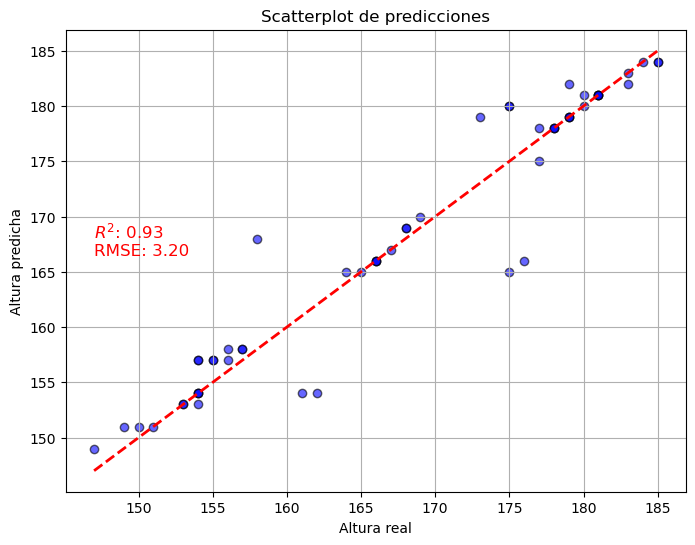

In [209]:
plt.figure(figsize=(8, 6))
plt.scatter(x=y_test_iteso, y=y_pred_mod, alpha=0.6, edgecolors='k',label="Predicciones vs Reales", color="blue")
plt.plot([y_test_iteso.min(), y_test_iteso.max()], [y_test_iteso.min(), y_test_iteso.max()], 'r--', lw=2,label="Línea Ideal")  # Línea de referencia
plt.xlabel("Altura real")
plt.ylabel("Altura predicha")
plt.title(f"Scatterplot de predicciones")
plt.text(y_test_iteso.min(), y_test_iteso.max() * 0.9, f"$R^2$: {r2_iteso:.2f}\nRMSE: {rmse_iteso:.2f}", fontsize=12, color="red")
plt.grid(True)
plt.show()

Podemos observar que, los errores se concentran principalmente en los lugares donde los modelos se juntan, por ejemplo: 160-165 y 170-175. Fuera de esos rangos, la predicción es muy buena.

---


### <font color= #74C79D> **3.** </font>
 Ahora, tu modelo será utilizado para predecir la altura de la población en Países bajos, cuya media de altura
 es de 183cm para hombres y 170cm para mujeres. Realiza la gráfica de tu propuesta con un scatterplot de
 los datos incluyendo el valor de R2 y RMSE.

Creamos un dataset síntetico para hombres y otro para mujeres.

In [210]:
altura_hombres = np.sort(np.round(np.random.normal(loc=183, scale=5, size=100), 0))
ancho_hombres = np.sort(np.round(np.random.normal(loc=46, scale=2, size=100), 0))
pies_hombres = np.sort(np.round(np.random.normal(loc=27, scale=1, size=100), 1))
df_hombres_sintetico = pd.DataFrame({'altura':altura_hombres, 'ancho':ancho_hombres, 'pie':pies_hombres})
df_hombres_sintetico.head()

,altura,ancho,pie
0,175.0,41.0,24.1
1,176.0,42.0,24.2
2,176.0,42.0,25.0
3,176.0,42.0,25.3
4,177.0,43.0,25.3


In [211]:
altura_mujeres = np.sort(np.round(np.random.normal(loc=170, scale=5, size=100), 0))
ancho_mujeres = np.sort(np.round(np.random.normal(loc=40, scale=2, size=100), 0)) 
pies_mujeres = np.sort(np.round(np.random.normal(loc=24, scale=1, size=100), 1))
df_mujeres_sintetico = pd.DataFrame({'altura':altura_mujeres, 'ancho':ancho_mujeres, 'pie':pies_mujeres})
df_mujeres_sintetico.head()

,altura,ancho,pie
0,158.0,36.0,21.4
1,159.0,36.0,21.4
2,162.0,36.0,22.0
3,162.0,37.0,22.2
4,162.0,37.0,22.4


Juntamos los dataframes:

In [212]:
df_paises_bajos = pd.concat([df_hombres_sintetico, df_mujeres_sintetico], ignore_index=True)
df_paises_bajos.head()

,altura,ancho,pie
0,175.0,41.0,24.1
1,176.0,42.0,24.2
2,176.0,42.0,25.0
3,176.0,42.0,25.3
4,177.0,43.0,25.3


In [213]:
X = df_paises_bajos[['ancho','pie']]
y = df_paises_bajos['altura']
X_train_pb, X_test_pb, y_train_pb, y_test_pb = train_test_split(X,y, test_size = 0.2, random_state = 42)

In [214]:
ridge_pb = Ridge()
ridge_pb.fit(X_train_pb, y_train_pb)
y_pred_pb = ridge_pb.predict(X_test_pb)
r2_pb = r2_score(y_test_pb, y_pred_pb)
mse_pb = mean_squared_error(y_test_pb, y_pred_pb)
print("R2", r2_pb, 'MSE', mse_pb)

R2 0.9933596183451952 MSE 0.4935422162548363


Esta sobreajustando nuestro modelo, podemos evitar esto a través de mover el parametro de alpha.

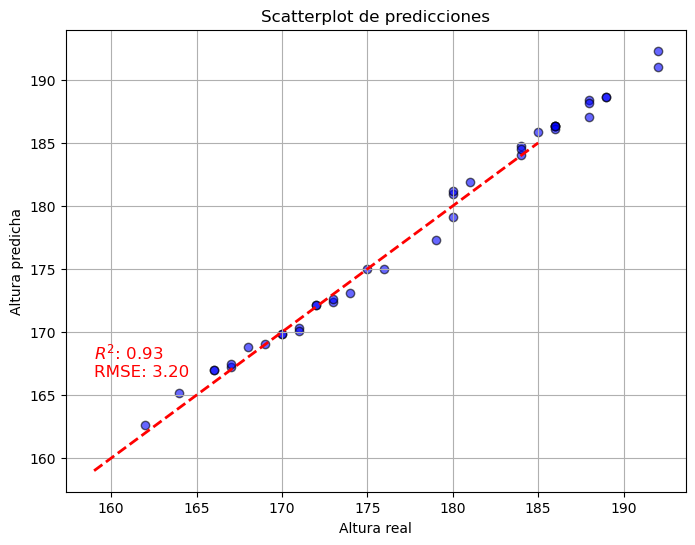

In [215]:
plt.figure(figsize=(8, 6))
plt.scatter(x=y_test_pb, y=y_pred_pb, alpha=0.6, edgecolors='k',label="Predicciones vs Reales", color="blue")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2,label="Línea Ideal")  # Línea de referencia
plt.xlabel("Altura real")
plt.ylabel("Altura predicha")
plt.title(f"Scatterplot de predicciones")
plt.text(y_test.min(), y_test.max() * 0.9, f"$R^2$: {r2_iteso:.2f}\nRMSE: {rmse_iteso:.2f}", fontsize=12, color="red")
plt.grid(True)
plt.show()

Hay que mover el Alpha.

In [216]:
for alpha in alphas_test:
    ridge_pb = Ridge(alpha=alpha)
    ridge_pb.fit(X_train_pb, y_train_pb)
    y_pred_pb = ridge_pb.predict(X_test_pb)
    r2_pb = r2_score(y_test_pb, y_pred_pb)
    rmse_pb = np.sqrt(mean_squared_error(y_test_pb, y_pred_pb))
    print("alpha", alpha, "R2", r2_pb, 'RMSE', rmse_pb)

alpha 10.0 R2 0.9916766105250782 RMSE 0.786530813512826
alpha 16.378937069540637 R2 0.991165019803583 RMSE 0.8103421383811105
alpha 26.826957952797258 R2 0.9906673719043624 RMSE 0.8328515776029425
alpha 43.939705607607905 R2 0.9901373707536415 RMSE 0.8561739044097976
alpha 71.96856730011521 R2 0.9893961832681399 RMSE 0.8877623844306762
alpha 117.87686347935866 R2 0.9879927407092695 RMSE 0.9446862136426503
alpha 193.06977288832496 R2 0.9848729250911044 RMSE 1.060335035817381
alpha 316.22776601683796 R2 0.9776980229749537 RMSE 1.287470583606058
alpha 517.9474679231213 R2 0.9617370637921895 RMSE 1.6863774249290655
alpha 848.3428982440716 R2 0.9288316003986513 RMSE 2.2999014805248708
alpha 1389.4954943731375 R2 0.8682649771898536 RMSE 3.129077058171447
alpha 2275.8459260747886 R2 0.7720087151692197 RMSE 4.116468116054676
alpha 3727.593720314938 R2 0.6429508214561743 RMSE 5.151451935089103
alpha 6105.402296585326 R2 0.4978217141529959 RMSE 6.109344255658698
alpha 10000.0 R2 0.35911707103007

Como lo que nos importa es la calidad de la predicción, hay que optimizar el RMSE a pesar de que pueda caer en sobreajuste

In [217]:
ridge_pb = Ridge(alpha=1, fit_intercept=True)
ridge_pb.fit(X_train_pb, y_train_pb)
y_pred_pb = ridge_pb.predict(X_test_pb)
r2_pb = r2_score(y_test_pb, y_pred_pb)
rmse_pb = np.sqrt(mean_squared_error(y_test_pb, y_pred_pb))
print("R2", r2_pb, 'RMSE', rmse_pb)

R2 0.9933596183451952 RMSE 0.7025255982915045


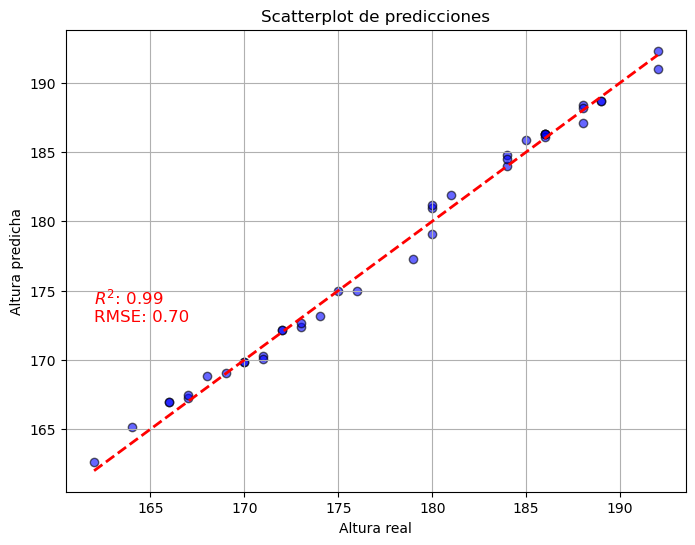

In [218]:
plt.figure(figsize=(8, 6))
plt.scatter(x=y_test_pb, y=y_pred_pb, alpha=0.6, edgecolors='k',label="Predicciones vs Reales", color="blue")
plt.plot([y_test_pb.min(), y_test_pb.max()], [y_test_pb.min(), y_test_pb.max()], 'r--', lw=2,label="Línea Ideal")  # Línea de referencia
plt.xlabel("Altura real")
plt.ylabel("Altura predicha")
plt.title(f"Scatterplot de predicciones")
plt.text(y_test_pb.min(), y_test_pb.max() * 0.9, f"$R^2$: {r2_pb:.2f}\nRMSE: {rmse_pb:.2f}", fontsize=12, color="red")
plt.grid(True)
plt.show()

---

### <font color= #74C79D> **4.** </font>
Finalmente, se informa que tu modelo será utilizado en ambos contextos indistintamente. Realiza la gráfica de tu propuesta con un scatterplot de los datos incluyendo el valor de R2 y RMSE.

    a. ¿Agregarías datos a tu base de datos para mejorar las predicciones del modelo?

    b. ¿Cómo conseguirías dicha información?

    c. ¿Modificarías algún parámetro de tu modelo?

### Unión de los 2 modelos anteriores

In [219]:
#Función para combinar los dos modelos 
def modelos_combinado(x_test, modelos=[ridge_menor, ridge_media, ridge_mayor], modelo_pb=ridge_pb) -> pd.Series:
    predicciones = []
    for _, row in x_test.iterrows():
        predicciones_modelo = []
        pesos = []

       
        if row.iloc[0] <= 45 and row.iloc[1] <= 24:  
            prediccion = modelos[0].predict(row.values.reshape(1, -1))  
            predicciones_modelo.append(np.round(prediccion, 0))
            pesos.append(1)
        #Agregamos pesos para mejorar la calidad de la probabilidad
        if 40 < row.iloc[0] < 50 and 22 < row.iloc[1] <= 26.5:
            prediccion = modelos[1].predict(row.values.reshape(1, -1))
            predicciones_modelo.append(np.round(prediccion, 0))
            distancia_menor = abs(row.iloc[1] - 22) / 4.5 
            distancia_mayor = abs(row.iloc[1] - 26.5) / 4.5
            peso = np.exp(-1.5 * (distancia_menor + distancia_mayor))
            pesos.append(peso)

        if row.iloc[0] >= 43 and row.iloc[1] > 26:
            prediccion = modelos[2].predict(row.values.reshape(1, -1))
            predicciones_modelo.append(np.round(prediccion, 0))
            pesos.append(1)

        
        if not predicciones_modelo:
            prediccion = modelo_pb.predict(row.values.reshape(1, -1))[0]
        else:
            predicciones_modelo = np.array(predicciones_modelo).flatten()
            pesos = np.array(pesos) / np.sum(pesos)
            prediccion = np.dot(predicciones_modelo, pesos)

        predicciones.append(np.round(prediccion, 0))

    return pd.Series(predicciones)





In [ ]:
df_combinado = pd.concat([df_paises_bajos, df_menor_sintetico, df_media_sint, df_mayor_sintetico], ignore_index=True)
#dataframe con los dataframes anteriores de los dos modelos unidos

In [ ]:
X = df_combinado[['ancho', 'pie']] 
y = df_combinado['altura']  
X_train_modelos, X_test_modelos, y_train_modelos, y_test_modelos = train_test_split(X, y, test_size=0.2, random_state=42)
#hacemos la división del train y test

In [222]:
ridge_modelos = Ridge()
grid_search = GridSearchCV(ridge_modelos, param_grid, cv=5, scoring='r2')
grid_search.fit(X_train_modelos, y_train_modelos)
best_alpha_modelos = grid_search.best_params_['alpha']
print(f"Mejor alpha encontrado: {best_alpha_modelos}")

Mejor alpha encontrado: 3.1992671377973836


Buscamos el mejor alpha para el modelo de rifge combinados que nos da '3.19'

In [223]:
y_pred_modelos = modelos_combinado(X_test_modelos)
r2_modelos = r2_score(y_test_modelos, y_pred_modelos)
rmse_modelos = np.sqrt(mean_squared_error(y_test_modelos, y_pred_modelos))
print(f'r2 {r2_modelos}, rmse {rmse_modelos}')

r2 0.7084411709517152, rmse 6.182317739454916


Obtuvimos un r2 no muy bueno, vamos a ver si podemos mejorarlo con el mejor alpha encontrado

In [224]:
ridge_modelos = Ridge(best_alpha_modelos)
ridge_modelos.fit(X_train_modelos, y_train_modelos)
y_pred_modelos = ridge_modelos.predict(X_test_modelos)
r2 = r2_score(y_test_modelos, y_pred_modelos)
rmse = np.sqrt(mean_squared_error(y_test_modelos, y_pred_modelos))
print("R2", r2, 'RMSE', rmse)

R2 0.8894302961216282 RMSE 3.8072053000681536


Podemos ver que mejoró nuestro r2 obteniendo 0.89 como resultado

In [225]:
alphas_test = np.linspace(1, 200, 10)
for alpha in alphas_test:
    ridge_modelos = Ridge(alpha=alpha)
    ridge_modelos.fit(X_train_modelos, y_train_modelos)
    y_pred_modelos = ridge_modelos.predict(X_test_modelos)
    r2_modelos = r2_score(y_test_modelos, y_pred_modelos)
    rmse_modelos = np.sqrt(mean_squared_error(y_test_modelos, y_pred_modelos))
    print("alpha", alpha, "R2", r2_modelos, 'RMSE', rmse_modelos)

alpha 1.0 R2 0.8888653024875567 RMSE 3.8169200130690393
alpha 23.11111111111111 R2 0.8909963140808641 RMSE 3.7801480988303715
alpha 45.22222222222222 R2 0.8877377556667432 RMSE 3.8362339398759557
alpha 67.33333333333333 R2 0.8816560626678517 RMSE 3.9387755218820404
alpha 89.44444444444444 R2 0.874163632857428 RMSE 4.061545371113745
alpha 111.55555555555556 R2 0.866057402114307 RMSE 4.190323785930011
alpha 133.66666666666666 R2 0.8577927878052485 RMSE 4.317665907751159
alpha 155.77777777777777 R2 0.8496297516747942 RMSE 4.43985903565803
alpha 177.88888888888889 R2 0.841713749470677 RMSE 4.555224849712681
alpha 200.0 R2 0.8341220461726702 RMSE 4.663184061241031


El alpha que usaremos es el que nos tiene un `R2` de $0.8909963140808641$

In [226]:
ridge_modelos = Ridge(alpha=23.11)
ridge_modelos.fit(X_train_modelos, y_train_modelos)
y_pred_modelos = ridge_modelos.predict(X_test_modelos)
r2_modelos = r2_score(y_test_modelos, y_pred_modelos)
rmse_modelos = np.sqrt(mean_squared_error(y_test_modelos, y_pred_modelos))
print("R2", r2_modelos, 'RMSE', rmse_modelos)

R2 0.8909963708155808 RMSE 3.78014711507621


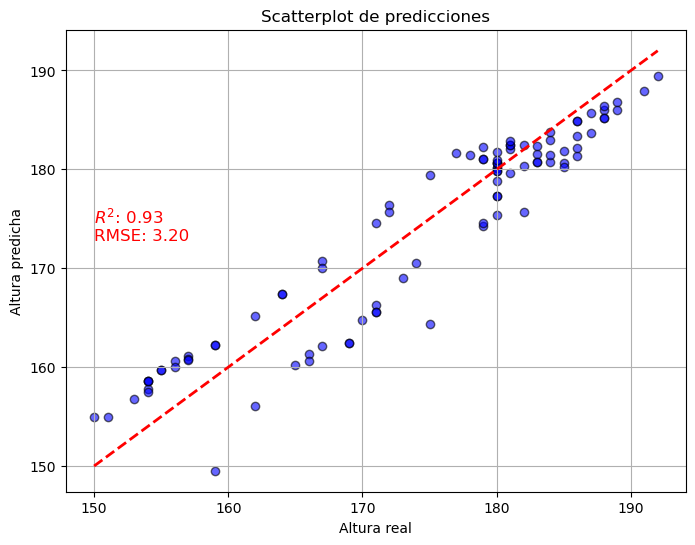

In [227]:
plt.figure(figsize=(8, 6))
plt.scatter(x=y_test_modelos, y=y_pred_modelos, alpha=0.6, edgecolors='k',label="Predicciones vs Reales", color="blue")
plt.plot([y_test_modelos.min(), y_test_modelos.max()], [y_test_modelos.min(), y_test_modelos.max()], 'r--', lw=2,label="Línea Ideal")  # Línea de referencia
plt.xlabel("Altura real")
plt.ylabel("Altura predicha")
plt.title(f"Scatterplot de predicciones")
plt.text(y_test_modelos.min(), y_test_modelos.max() * 0.9, f"$R^2$: {r2_iteso:.2f}\nRMSE: {rmse_iteso:.2f}", fontsize=12, color="red")
plt.grid(True)
plt.show()


Obtuvimos un r2 bueno, se puede observar que los errores se enfocan más en los valores altos, siendo por la combinación de ambos modelos de Países Bajos

## <font color= #74C79D> **Conclusión** </font>

Se logró realizar el proyecto, con distintos enfoques y retos en cada incio, no solo en código sino en observación de los reslutados, en visualización de gráficas, entre más.

De igual manera se demostraron nuestros conocimientos y aprendizajes ade la materia y de semestres pasados, junto con el trabajo en equipo para poder finalizar el proyecto. 

Lo que nos llevamos es que podemos seguir mejorando en distintos y varios aspectos pero es por ello que es muy importante seguir aprendiendo y superándonos al equivocarnos, trabajar en ello y no rendirnos.